In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [36]:
benin_df=pd.read_csv("../data/benin_clean.csv")
sl_df = pd.read_csv("../data/sierraleone_clean.csv")
togo_df = pd.read_csv("../data/togo_clean.csv")

# Append country column to each dataframe
benin_df['Country'] = 'Benin'
sl_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine dataframes
combined_df = pd.concat([benin_df, sl_df, togo_df])

Box Plots


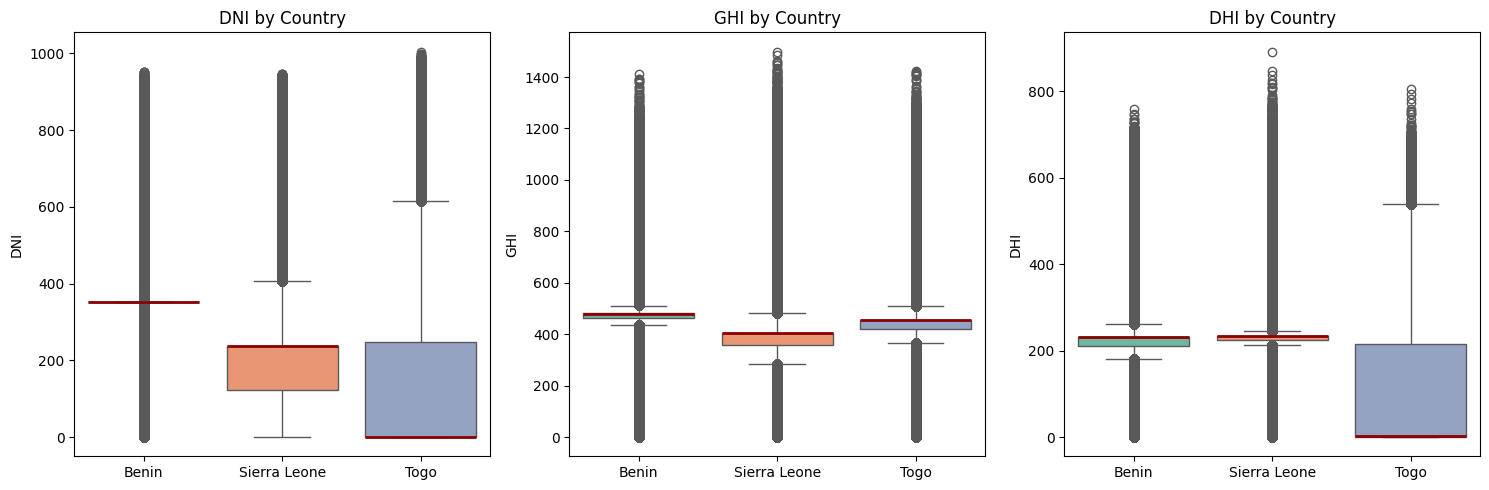

In [38]:
print("Box Plots")

columns_to_plot = ["DNI", "GHI", "DHI"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(columns_to_plot):
    sns.boxplot(
        x="Country",
        y=var,
        hue="Country",
        data=combined_df,
        ax=axes[i],
        legend=False,
        palette="Set2",
        medianprops={"color": "darkred", "linewidth": 2},
    )
    axes[i].set_title(f"{var} by Country")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [39]:
print("Summary Tables")

combined_df.groupby("Country")[columns_to_plot].agg(['mean', 'median', 'std'])

Summary Tables


DNI                                 GHI              \
                    mean      median         std        mean      median   
Country                                                                    
Benin         352.575567  352.575567  193.411273  476.746489  476.746489   
Sierra Leone  236.240484  236.240484  183.914983  406.239777  406.239777   
Togo          151.258469    0.000000  250.956962  454.081218  454.081218   

                                 DHI                          
                     std        mean      median         std  
Country                                                       
Benin         228.381555  230.808498  230.808498  107.140793  
Sierra Leone  216.394826  232.837959  232.837959  105.366834  
Togo          227.947498  116.444352    2.500000  156.520714

In [40]:
print("ANOVA Test for GHI across Countries")

groups = [group["GHI"].dropna() for name, group in combined_df.groupby("Country")]
f_stat, p_value = f_oneway(*groups)

print("One-way ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

ANOVA Test for GHI across Countries
One-way ANOVA Results:
F-statistic: 13534.289
P-value: 0.00000


# Summary

- Benin shows highest median value for DNI and GHI
- Togo shows spread (high variance)
- p-value of 0 shows GHI values across countries are very different

Ranking Countries by Average GHI


/var/folders/z4/j71xz2fs1270kjsdtgg3ckzh0000gn/T/ipykernel_3245/3457939909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ghi_means.index, y=ghi_means.values, palette="Set2")


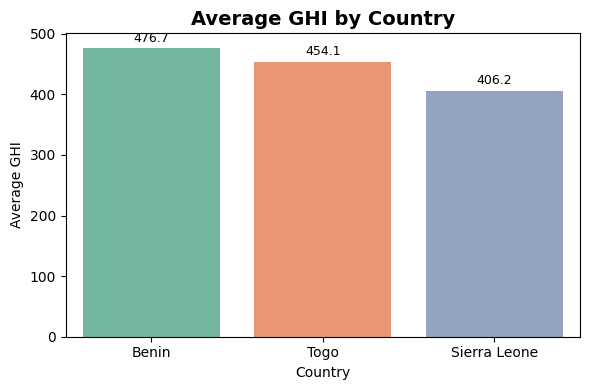

In [41]:
print("Ranking Countries by Average GHI")

ghi_means = combined_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=ghi_means.index, y=ghi_means.values, palette="Set2")

plt.title("Average GHI by Country", fontsize=14, weight="bold")
plt.xlabel("Country")
plt.ylabel("Average GHI")

for i, value in enumerate(ghi_means.values):
    plt.text(i, value + 5, f"{value:.1f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()